In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
import os

stats_root_dir = "/s/lattice-150/a/all/all/all/sustain/omniscient/data/spark-kmeans-svi-county"
graphs_root_dir = f'{stats_root_dir}/graphs'

# list of all file names
stat_file_names = os.listdir(stats_root_dir)
stat_file_names.remove('env')
stat_file_names.remove('aggregate.nmon.csv')
for file_name in stat_file_names:
    number = re.findall("^[^-]*[^ -]", file_name)[0]
    new_name = file_name.replace(number, number.zfill(2), 1)
    os.rename(f'{stats_root_dir}/{file_name}', f'{stats_root_dir}/{new_name}')
    
stat_file_names = os.listdir(stats_root_dir)

stat_file_names.remove("aggregate.nmon.csv")

for file_name in stat_file_names:
    # remove nvidia files
    if file_name.find(".nvidia") != -1:
        stat_file_names.remove(file_name)
    # remove non-csv files
    elif file_name.find(".csv") == -1:
        stat_file_names.remove(file_name)
        
def lattice_ip_to_host(ip):
    hostname = 'lattice-' + str(int(ip[-3:]) - 10)
    return hostname

stat_file_names.remove('env')

# Pad File number with zero if the number of digits is 1
for i in range(len(stat_file_names)):
    number = re.findall("^[^-]*[^ -]", stat_file_names[i])[0]
    s = stat_file_names[i]
    stat_file_names[i] = s.replace(number, number.zfill(2), 1)

stat_file_names = sorted(stat_file_names)

In [62]:
for file_name in stat_file_names:
    print(file_name)

00-129.82.208.160.nmon.csv
01-129.82.208.161.nmon.csv
02-129.82.208.162.nmon.csv
03-129.82.208.163.nmon.csv
04-129.82.208.164.nmon.csv
05-129.82.208.165.nmon.csv
06-129.82.208.166.nmon.csv
07-129.82.208.167.nmon.csv
08-129.82.208.168.nmon.csv
09-129.82.208.169.nmon.csv
10-129.82.208.170.nmon.csv
11-129.82.208.171.nmon.csv
12-129.82.208.172.nmon.csv
13-129.82.208.173.nmon.csv
14-129.82.208.174.nmon.csv
15-129.82.208.175.nmon.csv
16-129.82.208.176.nmon.csv
17-129.82.208.177.nmon.csv
18-129.82.208.178.nmon.csv
19-129.82.208.179.nmon.csv
20-129.82.208.180.nmon.csv
21-129.82.208.181.nmon.csv
22-129.82.208.182.nmon.csv
23-129.82.208.183.nmon.csv
24-129.82.208.184.nmon.csv


In [95]:
class MachineAverage():
    def __init__(self, name, cpu, memory, network_write, network_read):
        self.name = name
        self.cpu = cpu
        self. memory = memory
        self.network_write = network_write
        self.network_read = network_read
    
    def __str__(self):
        return f'[name={self.name}, cpu={self.cpu}, memory={self.memory}, \
                    network_write={self.network_write}, network_read={self.network_read}]'

In [123]:
averages = {}
for file_name in stat_file_names:
    df = pd.read_csv(f'{stats_root_dir}/{file_name}')
    df = df.drop(['MEM:memtotal', 'MEM:inactive'], axis=1)
    # Get DF of mean values of all columns
    mean_df = pd.DataFrame(df.mean()).transpose()
    # Find IP Address from file name
    ip = re.findall(r'[0-9]+(?:\.[0-9]+){3}', file_name)[0]
    # Map IP Address to Host name
    name = lattice_ip_to_host(ip).replace('lattice-', '')
    cpu = mean_df['CPU_ALL:User%'][0]
    memory = mean_df['MEM:active'][0]
    network_write = mean_df['NET:eno1-write-KB/s'][0]
    network_read = mean_df['NET:eno1-read-KB/s'][0]
    machine_average = MachineAverage(name, cpu, memory, network_write, network_read)
    averages[file_name] = machine_average
    

In [124]:
for key, value in averages.items():
    print(key, value.name)
    print()

00-129.82.208.160.nmon.csv 150

01-129.82.208.161.nmon.csv 151

02-129.82.208.162.nmon.csv 152

03-129.82.208.163.nmon.csv 153

04-129.82.208.164.nmon.csv 154

05-129.82.208.165.nmon.csv 155

06-129.82.208.166.nmon.csv 156

07-129.82.208.167.nmon.csv 157

08-129.82.208.168.nmon.csv 158

09-129.82.208.169.nmon.csv 159

10-129.82.208.170.nmon.csv 160

11-129.82.208.171.nmon.csv 161

12-129.82.208.172.nmon.csv 162

13-129.82.208.173.nmon.csv 163

14-129.82.208.174.nmon.csv 164

15-129.82.208.175.nmon.csv 165

16-129.82.208.176.nmon.csv 166

17-129.82.208.177.nmon.csv 167

18-129.82.208.178.nmon.csv 168

19-129.82.208.179.nmon.csv 169

20-129.82.208.180.nmon.csv 170

21-129.82.208.181.nmon.csv 171

22-129.82.208.182.nmon.csv 172

23-129.82.208.183.nmon.csv 173

24-129.82.208.184.nmon.csv 174



In [125]:
names = [machine.name for _, machine in averages.items()]
cpu_values = [machine.cpu for _, machine in averages.items()]
memory_values = [machine.memory for _, machine in averages.items()]
network_write_values = [machine.network_write for _, machine in averages.items()]
network_read_values = [machine.network_read for _, machine in averages.items()]

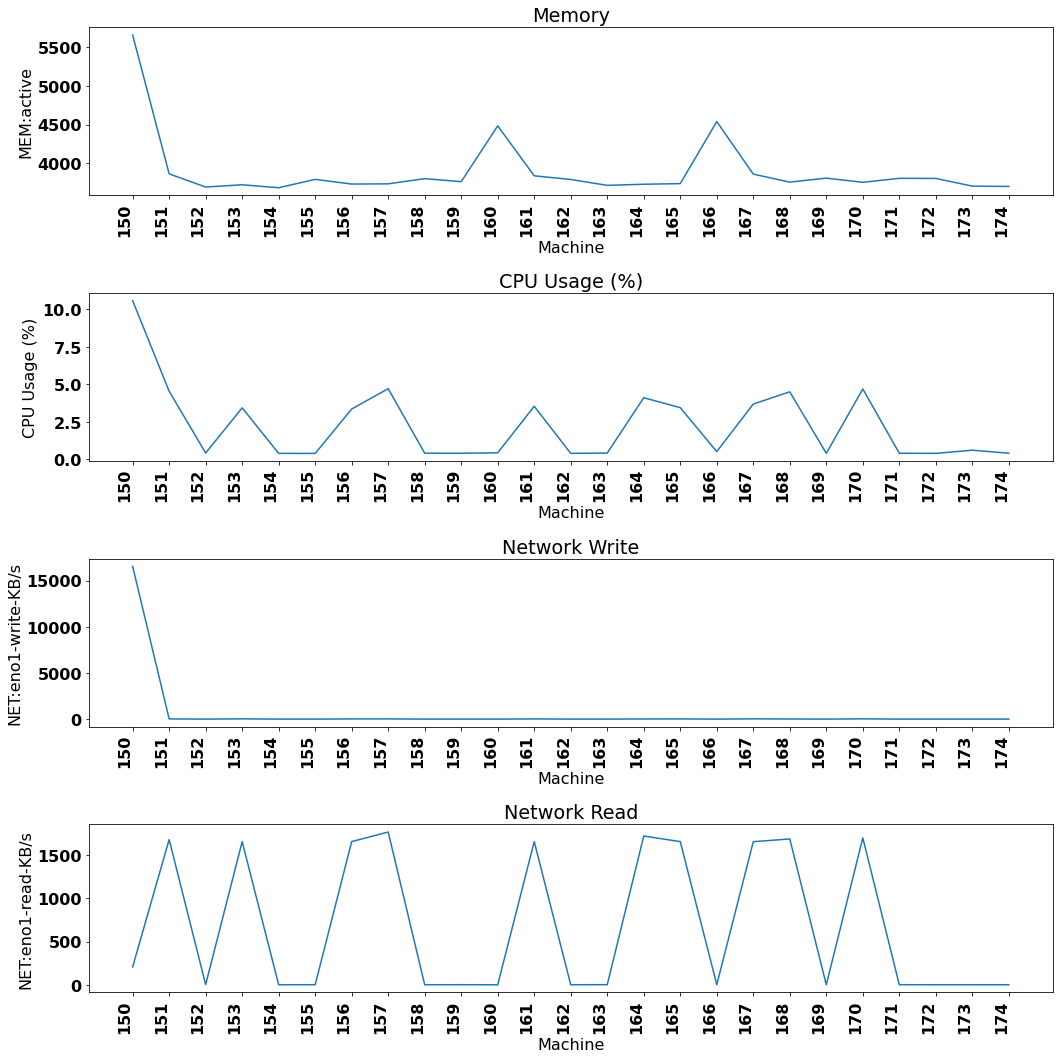

In [129]:
# update graph fonts
font = {
    'family': 'normal',
    'weight': 'bold',
    'size': 16
}
matplotlib.rc('font', **font)

plt1 = plt.figure(figsize=(15, 15))
plt.subplot(4, 1, 1)
plt.xlabel('Machine')
plt.ylabel('MEM:active')
plt.xticks(rotation=90, ha='right')
plt.plot(names, memory_values)
plt.title("Memory")

plt.subplot(4, 1, 2)
plt.xlabel('Machine')
plt.ylabel('CPU Usage (%)')
plt.xticks(rotation=90, ha='right')
plt.plot(names, cpu_values)
plt.title('CPU Usage (%)')

plt.subplot(4, 1, 3)
plt.xlabel('Machine')
plt.ylabel('NET:eno1-write-KB/s')
plt.xticks(rotation=90, ha='right')
plt.plot(names, network_write_values)
plt.title('Network Write')

plt.subplot(4, 1, 4)
plt.xlabel('Machine')
plt.ylabel('NET:eno1-read-KB/s')
plt.xticks(rotation=90, ha='right')
plt.plot(names, network_read_values)
plt.title('Network Read')


plt.tight_layout()